In [128]:
import pandas as pd
from datetime import datetime
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from statsmodels.sandbox.regression.predstd import wls_prediction_std
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv(r'C:\Users\1130j\Desktop\Yale\Twitter_Covid\Data\Master-file.csv')
df2= pd.read_excel(r'C:\Users\1130j\Desktop\Yale\Twitter_Covid\Data\demogStates.xlsx')

In [4]:
df.head(5)

,Unnamed: 0,date,STATEFP,total,facet1,facet2,facet3,facet4,facet5,facet6,facet1p,facet2p,facet3p,facet4p,facet5p,facet6p,user_count,facet1_user,facet2_user,facet3_user,facet4_user,facet5_user,facet6_user,facet1_weighted,facet2_weighted,facet3_weighted,facet4_weighted,facet5_weighted,facet6_weighted,weighted_sum,weighted_sum_v2,fips,state_name,state_abbr,long_name,state,statename,D,E,F,G,H,ratio,log_ratio,days_since,mobility_dri,Covid_cases
0,1,4/1/20,2,27,4,3,0,1,3,1,0.148148,0.111111,0.000000,0.037037,0.111111,0.037037,22,4,3,0,1,3,1,0.026936,0.015152,0.000000,0.001684,0.015152,0.001684,0.060606,0.058923,2,Alaska,AK,Alaska AK,AK,Alaska,596,328,49.0,44,4.1,0.134146,-2.008824,0,-32.22,142.0
1,2,4/1/20,5,96,17,3,0,5,6,3,0.177083,0.031250,0.000000,0.052083,0.062500,0.031250,80,15,3,0,5,6,3,0.033203,0.001172,0.000000,0.003255,0.004687,0.001172,0.043490,0.040234,5,Arkansas,AR,Arkansas AR,AR,Arkansas,5301,5497,49.1,345,3.2,0.062762,-2.768413,0,-21.74,584.0
2,3,4/1/20,6,2336,402,72,38,60,307,112,0.172089,0.030822,0.016267,0.025685,0.131421,0.047945,1814,374,72,37,59,280,101,0.035480,0.001223,0.000332,0.000835,0.020286,0.002669,0.060826,0.059991,6,California,CA,California CA,CA,California,40048,36499,52.5,5373,7.0,0.147210,-1.915898,0,-50.38,9415.0
3,4,4/1/20,10,16,2,1,0,0,2,0,0.125000,0.062500,0.000000,0.000000,0.125000,0.000000,12,2,1,0,0,2,0,0.020833,0.005208,0.000000,0.000000,0.020833,0.000000,0.046875,0.046875,10,Delaware,DE,Delaware DE,DE,Delaware,846,757,52.8,95,5.9,0.125495,-2.075486,0,-39.07,368.0
4,5,4/1/20,13,518,103,17,4,13,54,25,0.198842,0.032819,0.007722,0.025097,0.104247,0.048263,407,95,17,3,13,52,24,0.046413,0.001371,0.000057,0.000802,0.013319,0.002846,0.064807,0.064005,13,Georgia,GA,Georgia GA,GA,Georgia,13634,9648,58.2,2252,9.6,0.233416,-1.454932,0,-36.00,4638.0


In [5]:
df2.head(5)

,state,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,TOT_POP,TOT_MALE,TOT_FEMALE,male_prop,female_prop,WA_MALE,wa_male_prop,WA_FEMALE,wa_female,BA_MALE,ba_male_prop,BA_FEMALE,ba_female_prop,IA_MALE,ia_male_prop,IA_FEMALE,ia_female_prop,AA_MALE,aa_male_prop,AA_FEMALE,aa_female_prop,NA_MALE,na_male_prop,NA_FEMALE,na_female_prop,WHITE,white_prop,BLACK,black_prop,AA,AA_prop,IA,IA_prop,NA,NA_prop,0_18,19_25,26_34,35_54,55_64,65_more,65_more_prop
0,.Alabama,2145968,2082404,63564,4767100,2246161,2397701,0.471180,0.502968,1582594,0.704577,1643231,0.685336,571142,0.254275,656787,0.273924,16260,0.007239,15745,0.006567,33703,0.015005,38282,0.015966,2594,0.001155,2438,0.001017,3225825,0.694643,1227929,0.264420,71985,0.015100,32005,0.006714,5032,0.001056,1128100,414500,549500,1195300,645000,834700,0.175096
1,.Alaska,317662,299021,18641,701700,349589,324074,0.498203,0.461841,239476,0.685022,213948,0.660183,14666,0.041952,11879,0.036655,44684,0.127819,44400,0.137006,20243,0.057905,23747,0.073276,4949,0.014157,4937,0.015234,453424,0.673072,26545,0.039404,43990,0.062691,89084,0.126955,9886,0.014089,181700,65300,97500,172900,92800,91500,0.130398
2,.Arizona,3551259,3384504,166755,7098000,3565339,3606307,0.502302,0.508074,2953694,0.828447,2984112,0.827470,187493,0.052588,176787,0.049022,187347,0.052547,192813,0.053465,124070,0.034799,139626,0.038717,10528,0.002953,9261,0.002568,5937806,0.827956,364280,0.050794,263696,0.037151,380160,0.053559,19789,0.002788,1701600,656800,860500,1708100,877500,1293600,0.182249
3,.Arkansas,1217482,1175386,42096,2922500,1298580,1352416,0.444339,0.462760,1031115,0.794033,1060575,0.784208,196302,0.151167,219042,0.161963,13250,0.010203,13463,0.009955,23706,0.018255,24783,0.018325,5369,0.004135,5077,0.003754,2091690,0.789020,415344,0.156675,48489,0.016592,26713,0.009140,10446,0.003574,720800,253500,335600,723700,383200,505700,0.173037
4,.California,18299606,17577507,722099,38642700,18469427,18681864,0.477954,0.483451,13314942,0.720918,13206990,0.706942,1234785,0.066856,1257127,0.067291,304014,0.016460,294034,0.015739,2794562,0.151307,3092617,0.165541,93832,0.005080,95013,0.005086,26521932,0.713890,2491912,0.067075,5887179,0.152349,598048,0.015476,188845,0.004887,9171300,3539800,5288800,10152200,4751600,5739000,0.148514


In [6]:
df2['state'] = df2['state'].str.strip()
df2['state_name'] = df2['state'].str.replace('.','')
df2.head(5)

,state,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,TOT_POP,TOT_MALE,TOT_FEMALE,male_prop,female_prop,WA_MALE,wa_male_prop,WA_FEMALE,wa_female,BA_MALE,ba_male_prop,BA_FEMALE,ba_female_prop,IA_MALE,ia_male_prop,IA_FEMALE,ia_female_prop,AA_MALE,aa_male_prop,AA_FEMALE,aa_female_prop,NA_MALE,na_male_prop,NA_FEMALE,na_female_prop,WHITE,white_prop,BLACK,black_prop,AA,AA_prop,IA,IA_prop,NA,NA_prop,0_18,19_25,26_34,35_54,55_64,65_more,65_more_prop,state_name
0,.Alabama,2145968,2082404,63564,4767100,2246161,2397701,0.471180,0.502968,1582594,0.704577,1643231,0.685336,571142,0.254275,656787,0.273924,16260,0.007239,15745,0.006567,33703,0.015005,38282,0.015966,2594,0.001155,2438,0.001017,3225825,0.694643,1227929,0.264420,71985,0.015100,32005,0.006714,5032,0.001056,1128100,414500,549500,1195300,645000,834700,0.175096,Alabama
1,.Alaska,317662,299021,18641,701700,349589,324074,0.498203,0.461841,239476,0.685022,213948,0.660183,14666,0.041952,11879,0.036655,44684,0.127819,44400,0.137006,20243,0.057905,23747,0.073276,4949,0.014157,4937,0.015234,453424,0.673072,26545,0.039404,43990,0.062691,89084,0.126955,9886,0.014089,181700,65300,97500,172900,92800,91500,0.130398,Alaska
2,.Arizona,3551259,3384504,166755,7098000,3565339,3606307,0.502302,0.508074,2953694,0.828447,2984112,0.827470,187493,0.052588,176787,0.049022,187347,0.052547,192813,0.053465,124070,0.034799,139626,0.038717,10528,0.002953,9261,0.002568,5937806,0.827956,364280,0.050794,263696,0.037151,380160,0.053559,19789,0.002788,1701600,656800,860500,1708100,877500,1293600,0.182249,Arizona
3,.Arkansas,1217482,1175386,42096,2922500,1298580,1352416,0.444339,0.462760,1031115,0.794033,1060575,0.784208,196302,0.151167,219042,0.161963,13250,0.010203,13463,0.009955,23706,0.018255,24783,0.018325,5369,0.004135,5077,0.003754,2091690,0.789020,415344,0.156675,48489,0.016592,26713,0.009140,10446,0.003574,720800,253500,335600,723700,383200,505700,0.173037,Arkansas
4,.California,18299606,17577507,722099,38642700,18469427,18681864,0.477954,0.483451,13314942,0.720918,13206990,0.706942,1234785,0.066856,1257127,0.067291,304014,0.016460,294034,0.015739,2794562,0.151307,3092617,0.165541,93832,0.005080,95013,0.005086,26521932,0.713890,2491912,0.067075,5887179,0.152349,598048,0.015476,188845,0.004887,9171300,3539800,5288800,10152200,4751600,5739000,0.148514,California


In [7]:
dfinal = df.merge(df2, how='left', on='state_name')

In [8]:
dfinal['case_rate'] = dfinal['Covid_cases']/dfinal["TOT_POP"]

In [9]:
dfinal['log_case_rate'] = np.log(dfinal['case_rate'])

In [10]:
# dfinal.to_csv('facets_mobil_demog.csv')

In [11]:
dfinal.head(5)

,Unnamed: 0,date,STATEFP,total,facet1,facet2,facet3,facet4,facet5,facet6,facet1p,facet2p,facet3p,facet4p,facet5p,facet6p,user_count,facet1_user,facet2_user,facet3_user,facet4_user,facet5_user,facet6_user,facet1_weighted,facet2_weighted,facet3_weighted,facet4_weighted,facet5_weighted,facet6_weighted,weighted_sum,weighted_sum_v2,fips,state_name,state_abbr,long_name,state_x,statename,D,E,F,G,H,ratio,log_ratio,days_since,mobility_dri,Covid_cases,state_y,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,TOT_POP,TOT_MALE,TOT_FEMALE,male_prop,female_prop,WA_MALE,wa_male_prop,WA_FEMALE,wa_female,BA_MALE,ba_male_prop,BA_FEMALE,ba_female_prop,IA_MALE,ia_male_prop,IA_FEMALE,ia_female_prop,AA_MALE,aa_male_prop,AA_FEMALE,aa_female_prop,NA_MALE,na_male_prop,NA_FEMALE,na_female_prop,WHITE,white_prop,BLACK,black_prop,AA,AA_prop,IA,IA_prop,NA,NA_prop,0_18,19_25,26_34,35_54,55_64,65_more,65_more_prop,case_rate,log_case_rate
0,1,4/1/20,2,27,4,3,0,1,3,1,0.148148,0.111111,0.000000,0.037037,0.111111,0.037037,22,4,3,0,1,3,1,0.026936,0.015152,0.000000,0.001684,0.015152,0.001684,0.060606,0.058923,2,Alaska,AK,Alaska AK,AK,Alaska,596,328,49.0,44,4.1,0.134146,-2.008824,0,-32.22,142.0,.Alaska,317662,299021,18641,701700,349589,324074,0.498203,0.461841,239476,0.685022,213948,0.660183,14666,0.041952,11879,0.036655,44684,0.127819,44400,0.137006,20243,0.057905,23747,0.073276,4949,0.014157,4937,0.015234,453424,0.673072,26545,0.039404,43990,0.062691,89084,0.126955,9886,0.014089,181700,65300,97500,172900,92800,91500,0.130398,0.000202,-8.505434
1,2,4/1/20,5,96,17,3,0,5,6,3,0.177083,0.031250,0.000000,0.052083,0.062500,0.031250,80,15,3,0,5,6,3,0.033203,0.001172,0.000000,0.003255,0.004687,0.001172,0.043490,0.040234,5,Arkansas,AR,Arkansas AR,AR,Arkansas,5301,5497,49.1,345,3.2,0.062762,-2.768413,0,-21.74,584.0,.Arkansas,1217482,1175386,42096,2922500,1298580,1352416,0.444339,0.462760,1031115,0.794033,1060575,0.784208,196302,0.151167,219042,0.161963,13250,0.010203,13463,0.009955,23706,0.018255,24783,0.018325,5369,0.004135,5077,0.003754,2091690,0.789020,415344,0.156675,48489,0.016592,26713,0.009140,10446,0.003574,720800,253500,335600,723700,383200,505700,0.173037,0.000200,-8.518049
2,3,4/1/20,6,2336,402,72,38,60,307,112,0.172089,0.030822,0.016267,0.025685,0.131421,0.047945,1814,374,72,37,59,280,101,0.035480,0.001223,0.000332,0.000835,0.020286,0.002669,0.060826,0.059991,6,California,CA,California CA,CA,California,40048,36499,52.5,5373,7.0,0.147210,-1.915898,0,-50.38,9415.0,.California,18299606,17577507,722099,38642700,18469427,18681864,0.477954,0.483451,13314942,0.720918,13206990,0.706942,1234785,0.066856,1257127,0.067291,304014,0.016460,294034,0.015739,2794562,0.151307,3092617,0.165541,93832,0.005080,95013,0.005086,26521932,0.713890,2491912,0.067075,5887179,0.152349,598048,0.015476,188845,0.004887,9171300,3539800,5288800,10152200,4751600,5739000,0.148514,0.000244,-8.319809
3,4,4/1/20,10,16,2,1,0,0,2,0,0.125000,0.062500,0.000000,0.000000,0.125000,0.000000,12,2,1,0,0,2,0,0.020833,0.005208,0.000000,0.000000,0.020833,0.000000,0.046875,0.046875,10,Delaware,DE,Delaware DE,DE,Delaware,846,757,52.8,95,5.9,0.125495,-2.075486,0,-39.07,368.0,.Delaware,487265,468845,18420,940300,467927,499244,0.497636,0.530941,327447,0.699782,344572,0.690188,104719,0.223793,117351,0.235057,3247,0.006939,3211,0.006432,19448,0.041562,20136,0.040333,536,0.001145,513,0.001028,672019,0.694830,222070,0.229608,39584,0.042097,6458,0.006868,1049,0.001116,205400,75900,111000,227200,135700,185200,0.196958,0.000391,-7.845871
4,5,4/1/20,13,518,103,17,4,13,54,25,0.198842,0.032819,0.007722,0.025097,0.104247,0.048263,407,95,17,3,13,52,24,0.046413,0.001371,0.000057,0.000802,0.013319,0.002846,0.064807,0.064005,13,Georgia,GA,Georgia GA,GA,Georgia,13634,9648,58.2,2252,9.6,0.233416,-1.454932,0,-36.00,4638.0,.Georgia,4522712,4369687,153025,10294000,4448986,4723709,0.432192,0.458880,2684249,0.603340,2727927,0.577497,1422871,0.319819,1636001,0.346338,24831,0.005581,22226,0.004705,212454,0.047753,225831,0.047808,5536,0

In [12]:
dfinal['statename'].nunique()

50

### Single Facets without covariates

- Facet1 implementation. Facet2 adaptation. Facer3 social disruption. Facet4 purpose. Facet5 negative and Facet6 positive. 
- weighted_sum_v2 is the sum of all facets without facet4 – all facets should be negatively associated except facet 4.

In [14]:
for facet in ['facet1p', 'facet2p', 'facet3p', 'facet4p', 'facet5p', 'facet6p', 'weighted_sum_v2', 'mobility_dri']:
    
    facetp = dfinal[[facet]]
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

facet1p:                             OLS Regression Results                            
Dep. Variable:              case_rate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.135
Date:                Wed, 07 Apr 2021   Prob (F-statistic):              0.287
Time:                        21:53:50   Log-Likelihood:                 8538.8
No. Observations:                1960   AIC:                        -1.707e+04
Df Residuals:                    1958   BIC:                        -1.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.000     16.453

In [15]:
for facet in ['facet1p', 'facet2p', 'facet3p', 'facet4p', 'facet5p', 'facet6p', 'weighted_sum_v2', 'mobility_dri']:
    
    facetp = dfinal[[facet]]
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['log_case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

facet1p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     15.89
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           6.95e-05
Time:                        21:54:09   Log-Likelihood:                -2786.2
No. Observations:                1960   AIC:                             5576.
Df Residuals:                    1958   BIC:                             5587.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3821      0.051   -126.326

<font color=blue>Log case rate provides better measurement.
<font color=blue> Single facet analysis suggests facet1p, weighted_sum_v2, and mobility_dri are significantly associated with Log Case Rate.

### Multiple Facets without Covariates

In [16]:
facetp = dfinal[['facet1p', 'facet2p', 'facet3p', 'facet4p', 'facet5p', 'facet6p']]
X_p = sm.add_constant(facetp)
model = sm.OLS(dfinal['case_rate'], X_p)
results = model.fit()

print('{}: {}'.format(facet, results.summary()))

mobility_dri:                             OLS Regression Results                            
Dep. Variable:              case_rate   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9292
Date:                Wed, 07 Apr 2021   Prob (F-statistic):              0.473
Time:                        21:55:13   Log-Likelihood:                 8541.0
No. Observations:                1960   AIC:                        -1.707e+04
Df Residuals:                    1953   BIC:                        -1.703e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.000     1

In [20]:
for facet in ['facet2p', 'facet3p', 'facet4p', 'facet5p', 'facet6p', 'mobility_dri']:
    
    facetp = dfinal[['facet1p'] + [facet]]
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['log_case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

facet2p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     8.873
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           0.000146
Time:                        21:55:51   Log-Likelihood:                -2785.2
No. Observations:                1960   AIC:                             5576.
Df Residuals:                    1957   BIC:                             5593.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3541      0.055   -116.436

<font color=blue> Facet1p and Facet6p together are significantly associated with cases.

<font color=blue>Facet1p and mobility_dri together are significantly associated with cases.

In [21]:
for facet in ['facet2p', 'facet3p', 'facet4p', 'facet5p', 'facet6p']:
    
    facetp = dfinal[['mobility_dri'] + [facet]]
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['log_case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

facet2p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     18.97
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           6.95e-09
Time:                        21:57:20   Log-Likelihood:                -2775.3
No. Observations:                1960   AIC:                             5557.
Df Residuals:                    1957   BIC:                             5573.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.4239      0.036   -1

<font color=blue>Facet6p and mobility_dri together are significantly associated with cases.

In [18]:
for facet in ['facet2p', 'facet3p', 'facet4p', 'facet5p']:
    
    facetp = dfinal[['facet6p'] + [facet]]
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['log_case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

facet2p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.563
Date:                Wed, 07 Apr 2021   Prob (F-statistic):             0.0773
Time:                        21:55:16   Log-Likelihood:                -2791.5
No. Observations:                1960   AIC:                             5589.
Df Residuals:                    1957   BIC:                             5606.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5779      0.040   -162.906

In [23]:
for facet in ['facet4p', 'mobility_dri']:
    
    facetp = dfinal[['weighted_sum_v2'] + [facet]]
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['log_case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

facet4p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     7.185
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           0.000778
Time:                        21:59:02   Log-Likelihood:                -2786.9
No. Observations:                1960   AIC:                             5580.
Df Residuals:                    1957   BIC:                             5597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -6.4599      0

<font color=red> Based on above analysis, facet1p, weighted_sum_v2, mobility_dri, facet1p + facet6p, facet1p + mobility_dri, facet6p + mobility_dri, and weighted_sum_v2 + mobility_dri are selected to proceed with multivairate analysis.

### Facet1p with covariates 

In [24]:
dfinal['0_18_prop'] = dfinal['0_18']/dfinal['TOT_POP']
dfinal['19_25_prop'] = dfinal['19_25']/dfinal['TOT_POP']
dfinal['26_34_prop'] = dfinal['26_34']/dfinal['TOT_POP']
dfinal['35_54_prop'] = dfinal['35_54']/dfinal['TOT_POP']
dfinal['55_64_prop'] = dfinal['55_64']/dfinal['TOT_POP']

dfinal['0_25_prop'] = (dfinal['0_18'] + dfinal['19_25'])/dfinal['TOT_POP']

#### Step 1: Univariate Analysis for Each Covariate and Facet

In [25]:
for covariate in ['male_prop', 'female_prop',
        'wa_male_prop', 'wa_female', 
       'ba_male_prop',  'ba_female_prop', 
       'ia_male_prop',  'ia_female_prop', 
       'aa_male_prop', 'aa_female_prop', 
       'na_male_prop', 'na_female_prop',
        'white_prop', 'black_prop',  'AA_prop',  'IA_prop', 'NA_prop',
        '0_18_prop', '19_25_prop', '0_25_prop', '26_34_prop', '35_54_prop', '55_64_prop', '65_more_prop']:
    
    
    facetp = dfinal[['facet1p'] + [covariate]]
    
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['log_case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

mobility_dri:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     69.31
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           8.27e-30
Time:                        21:59:49   Log-Likelihood:                -2727.0
No. Observations:                1960   AIC:                             5460.
Df Residuals:                    1957   BIC:                             5477.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.4021      0.278    -3

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
mobility_dri:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     42.19
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           1.16e-18
Time:                        21:59:49   Log-Likelihood:                -2752.7
No. Observations:                1960   AIC:                             5511.
Df Residuals:                    1957   BIC:                             5528.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

#### Double check the correlation before fitting a multivariate model

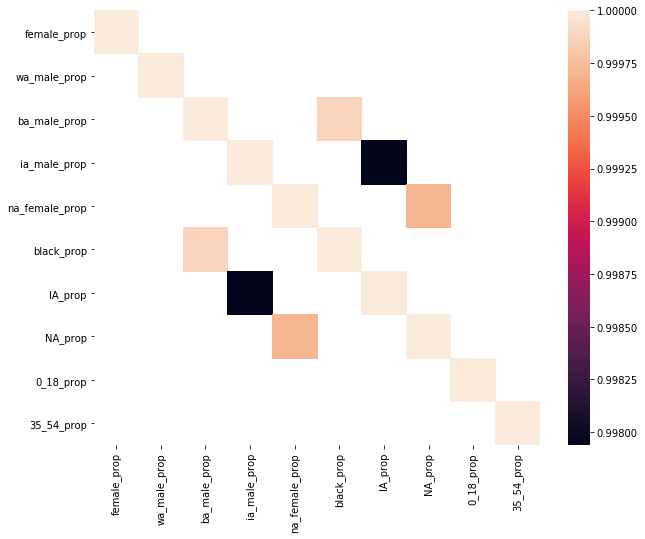

In [26]:
num_features = ['female_prop', 'wa_male_prop', 'ba_male_prop', 'ia_male_prop',
                  'na_female_prop', 'black_prop', 'IA_prop', 'NA_prop', '0_18_prop', '35_54_prop']
cor_mat = dfinal[num_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_mat[(cor_mat >= 0.7)|(cor_mat <= -0.7)], xticklabels=cor_mat.columns, yticklabels=cor_mat.columns)

In [27]:
cor_mat

,female_prop,wa_male_prop,ba_male_prop,ia_male_prop,na_female_prop,black_prop,IA_prop,NA_prop,0_18_prop,35_54_prop
female_prop,1.000000,-0.298292,0.213567,-0.219220,0.133179,0.214839,-0.178534,0.141814,-0.323374,0.393161
wa_male_prop,-0.298292,1.000000,-0.578632,0.030192,-0.633382,-0.576189,0.016456,-0.634019,-0.062005,-0.370491
ba_male_prop,0.213567,-0.578632,1.000000,-0.327830,-0.181491,0.999877,-0.320206,-0.176612,0.048135,0.349239
ia_male_prop,-0.219220,0.030192,-0.327830,1.000000,0.011353,-0.329389,0.997939,-0.001277,0.275017,-0.433071
na_female_prop,0.133179,-0.633382,-0.181491,0.011353,1.000000,-0.184349,0.018130,0.999711,0.018936,0.076427
black_prop,0.214839,-0.576189,0.999877,-0.329389,-0.184349,1.000000,-0.321725,-0.179467,0.048062,0.352916
IA_prop,-0.178534,0.016456,-0.320206,0.997939,0.018130,-0.321725,1.000000,0.005292,0.267543,-0.410863
NA_prop,0.141814,-0.634019,-0.176612,-0.001277,0.999711,-0.179467,0.005292,1.000000,0.010699,0.077928
0_18_prop,-0.323374,-0.062005,0.048135,0.275017,0.018936,0.048062,0.267543,0.010699,1.000000,-0.285707
35_54_prop,0.393161,-0.370491,0.349239,-0.433071,0.076427,0.352916,-0.410863,0.077928,-0.285707,1.000000


#### The following covariates are selected based on p-value < 0.05 and larger absoluate value of coefficient. High Correlated (|corr| >= 0.7) features are selected based on larger absolute coefficient.
#### for example, when male_prop and female_prop are both significant, select the one with larger absolute coefficient.
#### for example, when na_prop and na_feamale_prop are highly correlated, select the one with larger absolute coefficient.
- female_prop, wa_male_prop, ba_male_prop, ia_male_prop, na_female_prop, 0_18_prop, 35_54_prop
    - black_prop and 35_54_prop positively associated with log case rate.
    - IA_prop and 0_18_prop negatively associated with log case rate.

#### Step 2: Multivariate Linear Regression for Facet1p

In [28]:
for facet in ['facet1p']:
    
    covariates = ['female_prop', 'wa_male_prop', 'ba_male_prop', 'ia_male_prop',
                  'na_female_prop', '0_18_prop', '35_54_prop']
    
    facetp = dfinal[[facet] + covariates]
    
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['log_case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

facet1p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     109.6
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          3.05e-151
Time:                        22:00:03   Log-Likelihood:                -2430.5
No. Observations:                1960   AIC:                             4879.
Df Residuals:                    1951   BIC:                             4929.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.5094      1.49

#### Step 3: Remove non-significant variable
 - Remove 0_18_prop         

<font color=blue> Final model for facet1p

In [29]:
for facet in ['facet1p']:
    
    covariates = ['female_prop', 'wa_male_prop', 'ba_male_prop', 'ia_male_prop',
                  'na_female_prop', '35_54_prop']
    
    facetp = dfinal[[facet] + covariates]
    
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['log_case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

facet1p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     124.7
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.07e-151
Time:                        22:00:10   Log-Likelihood:                -2431.9
No. Observations:                1960   AIC:                             4880.
Df Residuals:                    1952   BIC:                             4924.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.9223      1.45

### Facet1p + Facet6p

In [30]:
for covariate in ['male_prop', 'female_prop',
        'wa_male_prop', 'wa_female', 
       'ba_male_prop',  'ba_female_prop', 
       'ia_male_prop',  'ia_female_prop', 
       'aa_male_prop', 'aa_female_prop', 
       'na_male_prop', 'na_female_prop',
        'white_prop', 'black_prop',  'AA_prop',  'IA_prop', 'NA_prop',
        '0_18_prop', '19_25_prop', '0_25_prop', '26_34_prop', '35_54_prop', '55_64_prop', '65_more_prop']:
    
    
    facetp = dfinal[['facet1p', 'facet6p'] + [covariate]]
    
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['log_case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

facet1p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     47.41
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           1.42e-29
Time:                        22:00:14   Log-Likelihood:                -2725.3
No. Observations:                1960   AIC:                             5459.
Df Residuals:                    1956   BIC:                             5481.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.4176      0.278    -33.876

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
facet1p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     28.82
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           3.13e-18
Time:                        22:00:14   Log-Likelihood:                -2751.7
No. Observations:                1960   AIC:                             5511.
Df Residuals:                    1956   BIC:                             5534.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [31]:
num_features = ['wa_male_prop',  'ba_male_prop',  'ia_male_prop', 
                'na_female_prop',  '26_34_prop']
cor_mat = dfinal[num_features].corr()
plt.figure(figsize=(10, 8))
# sns.heatmap(cor_mat[(cor_mat >= 0.7)|(cor_mat <= -0.7)], xticklabels=cor_mat.columns, yticklabels=cor_mat.columns)
cor_mat

,wa_male_prop,ba_male_prop,ia_male_prop,na_female_prop,26_34_prop
wa_male_prop,1.000000,-0.578632,0.030192,-0.633382,-0.073541
ba_male_prop,-0.578632,1.000000,-0.327830,-0.181491,-0.115823
ia_male_prop,0.030192,-0.327830,1.000000,0.011353,0.191396
na_female_prop,-0.633382,-0.181491,0.011353,1.000000,0.013319
26_34_prop,-0.073541,-0.115823,0.191396,0.013319,1.000000


<Figure size 720x576 with 0 Axes>

<font color=blue>wa_male_prop -0.7885, ba_male_prop 3.4091, ia_male_prop -9.8355, na_female_prop -14.889, 26_34_prop 15.3389 are selected for multivariate model.

facet1p + facet6pMultivariate model

In [32]:
covariates = ['wa_male_prop', 'ba_male_prop', 'ia_male_prop',
              'na_female_prop', '26_34_prop']

facetp = dfinal[['facet1p', 'facet6p'] + covariates]

X_p = sm.add_constant(facetp)
model = sm.OLS(dfinal['log_case_rate'],X_p)
results = model.fit()

print('{}: {}'.format(facet, results.summary()))

facet1p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     90.89
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          7.06e-115
Time:                        22:00:24   Log-Likelihood:                -2517.6
No. Observations:                1960   AIC:                             5051.
Df Residuals:                    1952   BIC:                             5096.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2395      0.95

### weighted_sum_v2

In [34]:
for covariate in ['male_prop', 'female_prop',
        'wa_male_prop', 'wa_female', 
       'ba_male_prop',  'ba_female_prop', 
       'ia_male_prop',  'ia_female_prop', 
       'aa_male_prop', 'aa_female_prop', 
       'na_male_prop', 'na_female_prop',
        'white_prop', 'black_prop',  'AA_prop',  'IA_prop', 'NA_prop',
        '0_18_prop', '19_25_prop', '0_25_prop', '26_34_prop', '35_54_prop', '55_64_prop', '65_more_prop']:
    
    
    facetp = dfinal[['weighted_sum_v2'] + [covariate]]
    
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['log_case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

facet1p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     63.93
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           1.28e-27
Time:                        22:01:24   Log-Likelihood:                -2732.1
No. Observations:                1960   AIC:                             5470.
Df Residuals:                    1957   BIC:                             5487.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -9.4301      0

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
facet1p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     31.18
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           4.68e-14
Time:                        22:01:24   Log-Likelihood:                -2763.4
No. Observations:                1960   AIC:                             5533.
Df Residuals:                    1957   BIC:                             5549.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [35]:
num_features = ['female_prop',  'wa_male_prop',  'ba_male_prop', 
                'ia_male_prop',  'na_female_prop',
               'white_prop', 'black_prop', 'IA_prop', 'NA_prop',
               '0_18_prop', '0_25_prop', '26_34_prop',
               '35_54_prop', '55_64_prop']
cor_mat = dfinal[num_features].corr(), 
plt.figure(figsize=(10, 8))
# sns.heatmap(cor_mat[(cor_mat >= 0.7)|(cor_mat <= -0.7)], xticklabels=cor_mat.columns, yticklabels=cor_mat.columns)
cor_mat

(                female_prop  wa_male_prop  ba_male_prop  ia_male_prop  \
 female_prop        1.000000     -0.298292      0.213567     -0.219220   
 wa_male_prop      -0.298292      1.000000     -0.578632      0.030192   
 ba_male_prop       0.213567     -0.578632      1.000000     -0.327830   
 ia_male_prop      -0.219220      0.030192     -0.327830      1.000000   
 na_female_prop     0.133179     -0.633382     -0.181491      0.011353   
 white_prop        -0.298195      0.999823     -0.584017      0.031254   
 black_prop         0.214839     -0.576189      0.999877     -0.329389   
 IA_prop           -0.178534      0.016456     -0.320206      0.997939   
 NA_prop            0.141814     -0.634019     -0.176612     -0.001277   
 0_18_prop         -0.323374     -0.062005      0.048135      0.275017   
 0_25_prop         -0.328071      0.003993      0.024844      0.288815   
 26_34_prop         0.060872     -0.073541     -0.115823      0.191396   
 35_54_prop         0.393161     -0.37

<Figure size 720x576 with 0 Axes>

female_prop 8.4287, wa_male_prop -0.6995, ba_male_prop 3.3521, ia_male_prop -9.4446, na_female_prop -15.1188, 0_18_prop -8.7381, 26_34_prop 14.8248, 35_54_prop 25.4616

In [39]:
# covariates = ['female_prop', 'wa_male_prop', 'ba_male_prop', 'ia_male_prop', 'na_female_prop', '0_18_prop', '26_34_prop', '35_54_prop']
covariates = ['female_prop', 'na_female_prop', '0_18_prop', '26_34_prop']

facetp = dfinal[['weighted_sum_v2'] + covariates]

X_p = sm.add_constant(facetp)
model = sm.OLS(dfinal['log_case_rate'], X_p)
results = model.fit()

print('{}'.format(results.summary()))

                            OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     110.9
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          2.68e-103
Time:                        22:18:58   Log-Likelihood:                -2549.4
No. Observations:                1960   AIC:                             5111.
Df Residuals:                    1954   BIC:                             5144.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -11.3877      0.448    -

### mobility_dri
#### Linear Model

In [41]:
for covariate in ['male_prop', 'female_prop',
        'wa_male_prop', 'wa_female', 
       'ba_male_prop',  'ba_female_prop', 
       'ia_male_prop',  'ia_female_prop', 
       'aa_male_prop', 'aa_female_prop', 
       'na_male_prop', 'na_female_prop',
        'white_prop', 'black_prop',  'AA_prop',  'IA_prop', 'NA_prop',
        '0_18_prop', '19_25_prop', '0_25_prop', '26_34_prop', '35_54_prop', '55_64_prop', '65_more_prop']:
    
    
    facetp = dfinal[['mobility_dri'] + [covariate]]
    
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['log_case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

facet1p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     108.4
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           2.30e-45
Time:                        22:21:31   Log-Likelihood:                -2691.1
No. Observations:                1960   AIC:                             5388.
Df Residuals:                    1957   BIC:                             5405.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -10.1682      0.280    -

strong multicollinearity or other numerical problems.
facet1p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     18.90
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           7.39e-09
Time:                        22:21:31   Log-Likelihood:                -2775.3
No. Observations:                1960   AIC:                             5557.
Df Residuals:                    1957   BIC:                             5573.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

female_prop 10.8298,  wa_male_prop -1.1645, ba_male_prop 3.5618, ia_male_prop -10.9835, na_female_prop -13.9928, 26_34_prop 18.0527, 35_54_prop 35.7347, 55_64_prop 13.2772

In [56]:
num_features = ['female_prop',  'wa_male_prop',  'ba_male_prop', 
                'ia_male_prop', 'na_female_prop',
               '26_34_prop', '35_54_prop', '55_64_prop']
cor_mat = dfinal[num_features].corr(), 
plt.figure(figsize=(10, 8))
# sns.heatmap(cor_mat[(cor_mat >= 0.7)|(cor_mat <= -0.7)], xticklabels=cor_mat.columns, yticklabels=cor_mat.columns)
cor_mat

(                female_prop  wa_male_prop  ba_male_prop  ia_male_prop  \
 female_prop        1.000000     -0.298292      0.213567     -0.219220   
 wa_male_prop      -0.298292      1.000000     -0.578632      0.030192   
 ba_male_prop       0.213567     -0.578632      1.000000     -0.327830   
 ia_male_prop      -0.219220      0.030192     -0.327830      1.000000   
 na_female_prop     0.133179     -0.633382     -0.181491      0.011353   
 26_34_prop         0.060872     -0.073541     -0.115823      0.191396   
 35_54_prop         0.393161     -0.370491      0.349239     -0.433071   
 55_64_prop         0.161900      0.177813     -0.044637     -0.169924   
 
                 na_female_prop  26_34_prop  35_54_prop  55_64_prop  
 female_prop           0.133179    0.060872    0.393161    0.161900  
 wa_male_prop         -0.633382   -0.073541   -0.370491    0.177813  
 ba_male_prop         -0.181491   -0.115823    0.349239   -0.044637  
 ia_male_prop          0.011353    0.191396   -0.433

<Figure size 720x576 with 0 Axes>

In [53]:
covariates = ['female_prop',  'wa_male_prop',  'ba_male_prop', 'ia_male_prop',
              'na_female_prop', '26_34_prop', '35_54_prop', '55_64_prop']

facetp = dfinal[['mobility_dri'] + covariates]

X_p = sm.add_constant(facetp)
model = sm.OLS(dfinal['log_case_rate'], X_p)
results = model.fit()

print('{}'.format(results.summary()))

                            OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     167.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          9.93e-235
Time:                        22:32:14   Log-Likelihood:                -2233.7
No. Observations:                1960   AIC:                             4487.
Df Residuals:                    1950   BIC:                             4543.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7356      1.496     -1.

### mobility_dri + weighted_sum_v2
#### Linear Mixed Model

In [129]:
model = smf.mixedlm("log_case_rate ~ mobility_dri + weighted_sum_v2", dfinal, groups= "statename").fit()
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:            MixedLM Dependent Variable: log_case_rate
No. Observations: 1960    Method:             REML         
No. Groups:       50      Scale:              0.1945       
Min. group size:  23      Likelihood:         -1315.2698   
Max. group size:  42      Converged:          Yes          
Mean group size:  39.2                                     
-----------------------------------------------------------
                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept       -6.100    0.141 -43.243 0.000 -6.376 -5.824
mobility_dri     0.024    0.001  43.131 0.000  0.023  0.025
weighted_sum_v2 -0.233    0.193  -1.209 0.227 -0.611  0.145
statename Var    0.979    0.457                            
===========================================================

"""

#### Check residuals and goodness of fit

In [135]:
# fig = plt.figure(figsize = (8, 5))

# ax = sns.distplot(model.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)

# ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
# ax.set_xlabel("Residuals")

In [136]:
# fig = plt.figure(figsize = (8, 5))
# ax = fig.add_subplot(111)

# sm.qqplot(model.resid, dist = stats.norm, line = 's', ax = ax)

# ax.set_title("Q-Q Plot")

In [137]:
labels = ["Statistic", "p-value"]

norm_res = stats.shapiro(model.resid)

for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)

Statistic 0.9623969197273254
p-value 3.752201118465638e-22


Text(0,0.5,'Residuals')

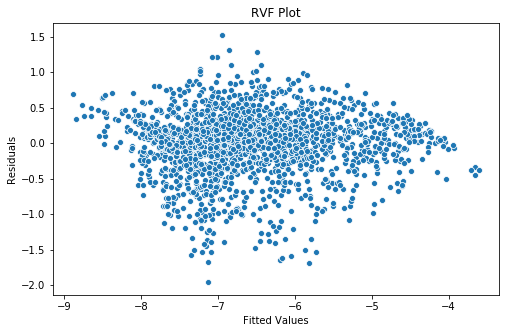

In [140]:
fig = plt.figure(figsize = (8, 5))

ax = sns.scatterplot(y = model.resid, x = model.fittedvalues)

ax.set_title("RVF Plot")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")

Text(0.5,0,'Litter')

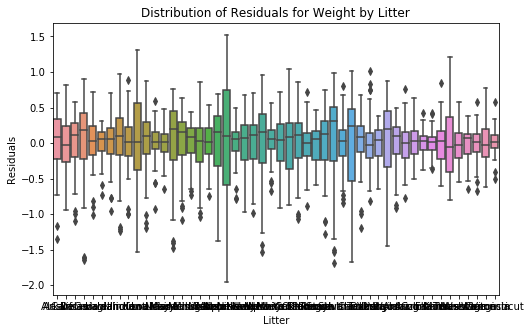

In [142]:
fig = plt.figure(figsize = (8, 5))

ax = sns.boxplot(x = model.model.groups, y = model.resid)

ax.set_title("Distribution of Residuals for Weight by Litter")
ax.set_ylabel("Residuals")
ax.set_xlabel("Litter")

In [138]:
from statsmodels.stats.diagnostic import het_white

het_white_res = het_white(model.resid, model.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

LM Statistic 45.44890982721387
LM-Test p-value 1.1758129663540766e-08
F-Statistic 9.277074950698857
F-Test p-value 9.614427952677176e-09


<font color=red> log_case_rate ~ mobility_dri + weighted_sum_v2 without covariates is not a good fit.

In [143]:
dfinal['p0_18_prop'] = dfinal['0_18_prop'] 
dfinal['p19_25_prop'] = dfinal['19_25_prop']
dfinal['p0_25_prop'] = dfinal['0_25_prop'] 
dfinal['p26_34_prop'] = dfinal['26_34_prop'] 
dfinal['p35_54_prop'] = dfinal['35_54_prop'] 
dfinal['p55_64_prop'] = dfinal['55_64_prop'] 
dfinal['p65_more_prop'] = dfinal['65_more_prop'] 

In [144]:
for covariate in ['male_prop', 'female_prop',
        'wa_male_prop', 'wa_female', 
       'ba_male_prop',  'ba_female_prop', 
       'ia_male_prop',  'ia_female_prop', 
       'aa_male_prop', 'aa_female_prop', 
       'na_male_prop', 'na_female_prop',
        'white_prop', 'black_prop',  'AA_prop',  'IA_prop', 'NA_prop',
        'p0_18_prop', 'p19_25_prop', 'p0_25_prop', 'p26_34_prop', 'p35_54_prop', 'p55_64_prop', 'p65_more_prop']:
    
    frm = "log_case_rate ~ mobility_dri + weighted_sum_v2 +" + covariate
    model = smf.mixedlm(frm, dfinal, groups= "statename").fit()
    print(model.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: log_case_rate
No. Observations:  1960    Method:             REML         
No. Groups:        50      Scale:              0.1945       
Min. group size:   23      Likelihood:         -1308.5490   
Max. group size:   42      Converged:          Yes          
Mean group size:   39.2                                     
------------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
------------------------------------------------------------
Intercept       -11.296    1.665 -6.786 0.000 -14.558 -8.033
mobility_dri      0.024    0.001 43.187 0.000   0.023  0.025
weighted_sum_v2  -0.234    0.193 -1.211 0.226  -0.612  0.144
male_prop        10.951    3.498  3.131 0.002   4.095 17.806
statename Var     0.830    0.392                            

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: 

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: log_case_rate
No. Observations: 1960    Method:             REML         
No. Groups:       50      Scale:              0.1945       
Min. group size:  23      Likelihood:         -1312.6441   
Max. group size:  42      Converged:          Yes          
Mean group size:  39.2                                     
-----------------------------------------------------------
                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept       -6.248    0.180 -34.670 0.000 -6.601 -5.895
mobility_dri     0.024    0.001  43.166 0.000  0.023  0.025
weighted_sum_v2 -0.234    0.193  -1.212 0.226 -0.612  0.144
aa_female_prop   3.080    2.363   1.303 0.193 -1.553  7.712
statename Var    0.966    0.456                            

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: log_case_rate


           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: log_case_rate
No. Observations:  1960    Method:             REML         
No. Groups:        50      Scale:              0.1945       
Min. group size:   23      Likelihood:         -1310.9383   
Max. group size:   42      Converged:          Yes          
Mean group size:   39.2                                     
------------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
------------------------------------------------------------
Intercept        -4.652    2.043 -2.277 0.023  -8.656 -0.647
mobility_dri      0.024    0.001 43.144 0.000   0.023  0.025
weighted_sum_v2  -0.234    0.193 -1.213 0.225  -0.612  0.144
p19_25_prop     -16.770   23.605 -0.710 0.477 -63.034 29.495
statename Var     0.990    0.467                            

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: 

In [145]:
num_features = ['ba_female_prop',  'ia_male_prop',  'black_prop', 
                'IA_prop', 'p0_18_prop',
               'p35_54_prop']
cor_mat = dfinal[num_features].corr(), 
plt.figure(figsize=(10, 8))
# sns.heatmap(cor_mat[(cor_mat >= 0.7)|(cor_mat <= -0.7)], xticklabels=cor_mat.columns, yticklabels=cor_mat.columns)
cor_mat

(                ba_female_prop  ia_male_prop  black_prop   IA_prop  \
 ba_female_prop        1.000000     -0.331007    0.999900 -0.323287   
 ia_male_prop         -0.331007      1.000000   -0.329389  0.997939   
 black_prop            0.999900     -0.329389    1.000000 -0.321725   
 IA_prop              -0.323287      0.997939   -0.321725  1.000000   
 p0_18_prop            0.047752      0.275017    0.048062  0.267543   
 p35_54_prop           0.356394     -0.433071    0.352916 -0.410863   
 
                 p0_18_prop  p35_54_prop  
 ba_female_prop    0.047752     0.356394  
 ia_male_prop      0.275017    -0.433071  
 black_prop        0.048062     0.352916  
 IA_prop           0.267543    -0.410863  
 p0_18_prop        1.000000    -0.285707  
 p35_54_prop      -0.285707     1.000000  ,)

<Figure size 720x576 with 0 Axes>

ia_male_prop -13.547, black_prop 3.645, p0_18_prop -16.478, p35_54_prop 48.497

In [119]:
frm = "log_case_rate ~ mobility_dri + weighted_sum_v2 + ia_male_prop + black_prop + p0_18_prop + p35_54_prop" 
model = smf.mixedlm(frm, dfinal, groups= "statename").fit()
print(model.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: log_case_rate
No. Observations:  1960    Method:             REML         
No. Groups:        50      Scale:              0.1945       
Min. group size:   23      Likelihood:         -1295.8047   
Max. group size:   42      Converged:          Yes          
Mean group size:   39.2                                     
------------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
------------------------------------------------------------
Intercept        -9.744    4.567 -2.134 0.033 -18.696 -0.793
mobility_dri      0.024    0.001 43.220 0.000   0.023  0.025
weighted_sum_v2  -0.230    0.193 -1.194 0.233  -0.608  0.148
ia_male_prop     -4.337    5.207 -0.833 0.405 -14.542  5.868
black_prop        2.551    1.415  1.803 0.071  -0.222  5.325
p0_18_prop      -12.223    6.320 -1.934 0.053 -24.611  0.165
p35_54_prop      25.168   15.927  1.

In [146]:
frm = "log_case_rate ~ mobility_dri + weighted_sum_v2 + black_prop + p0_18_prop"
model = smf.mixedlm(frm, dfinal, groups= "statename").fit()
print(model.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: log_case_rate
No. Observations:  1960    Method:             REML         
No. Groups:        50      Scale:              0.1945       
Min. group size:   23      Likelihood:         -1304.1440   
Max. group size:   42      Converged:          Yes          
Mean group size:   39.2                                     
------------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
------------------------------------------------------------
Intercept        -2.466    1.411 -1.747 0.081  -5.232  0.300
mobility_dri      0.024    0.001 43.176 0.000   0.023  0.025
weighted_sum_v2  -0.233    0.193 -1.209 0.227  -0.611  0.145
black_prop        3.812    1.304  2.924 0.003   1.257  6.367
p0_18_prop      -17.245    5.962 -2.892 0.004 -28.931 -5.559
statename Var     0.758    0.362                            



In [147]:
labels = ["Statistic", "p-value"]

norm_res = stats.shapiro(model.resid)

for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)

Statistic 0.9625273942947388
p-value 4.088236931428064e-22


Text(0,0.5,'Residuals')

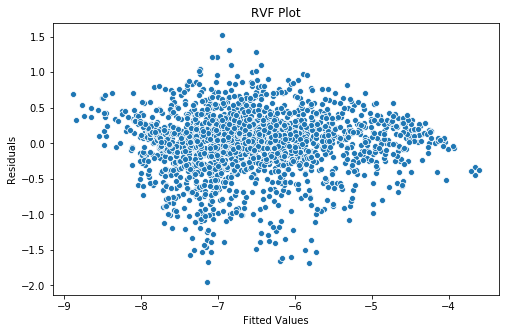

In [148]:
fig = plt.figure(figsize = (8, 5))

ax = sns.scatterplot(y = model.resid, x = model.fittedvalues)

ax.set_title("RVF Plot")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")

Text(0.5,0,'Litter')

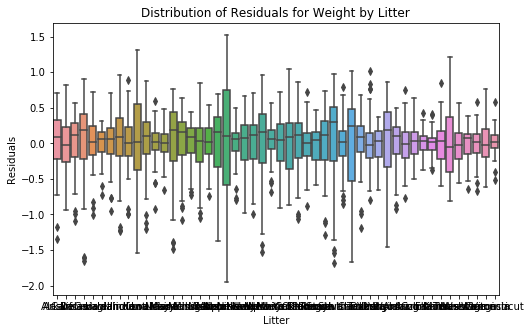

In [149]:
fig = plt.figure(figsize = (8, 5))

ax = sns.boxplot(x = model.model.groups, y = model.resid)

ax.set_title("Distribution of Residuals for Weight by Litter")
ax.set_ylabel("Residuals")
ax.set_xlabel("Litter")

In [150]:
from statsmodels.stats.diagnostic import het_white

het_white_res = het_white(model.resid, model.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

LM Statistic 107.1244393256948
LM-Test p-value 2.0162259046892926e-16
F-Statistic 8.03218825725637
F-Test p-value 6.524897814517573e-17


<font color=red> log_case_rate ~ mobility_dri + weighted_sum_v2 + black_prop + p0_18_prop not a good fit.

### Final Models

<font color=blue> Facet1p

In [107]:
covariates = ['female_prop', 'wa_male_prop', 'ba_male_prop', 'ia_male_prop',
              'na_female_prop', '35_54_prop']

facetp = dfinal[['facet1p'] + covariates]

X_p = sm.add_constant(facetp)
model = sm.OLS(dfinal['log_case_rate'],X_p)
results = model.fit()

print('{}: {}'.format(facet, results.summary()))

facet5p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     124.7
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.07e-151
Time:                        14:15:40   Log-Likelihood:                -2431.9
No. Observations:                1960   AIC:                             4880.
Df Residuals:                    1952   BIC:                             4924.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.9223      1.45

<font color=blue> Facet1p + Facet6p

In [108]:
covariates = ['wa_male_prop', 'ba_male_prop', 'ia_male_prop',
              'na_female_prop', '26_34_prop']

facetp = dfinal[['facet1p', 'facet6p'] + covariates]

X_p = sm.add_constant(facetp)
model = sm.OLS(dfinal['log_case_rate'],X_p)
results = model.fit()

print('{}: {}'.format(facet, results.summary()))

facet5p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     90.89
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          7.06e-115
Time:                        14:15:42   Log-Likelihood:                -2517.6
No. Observations:                1960   AIC:                             5051.
Df Residuals:                    1952   BIC:                             5096.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2395      0.95

<font color=blue> weighted_sum_v2

In [40]:
covariates = ['female_prop', 'na_female_prop', '0_18_prop', '26_34_prop']

facetp = dfinal[['weighted_sum_v2'] + covariates]

X_p = sm.add_constant(facetp)
model = sm.OLS(dfinal['log_case_rate'], X_p)
results = model.fit()

print('{}'.format(results.summary()))

                            OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     110.9
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          2.68e-103
Time:                        22:21:10   Log-Likelihood:                -2549.4
No. Observations:                1960   AIC:                             5111.
Df Residuals:                    1954   BIC:                             5144.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -11.3877      0.448    -

<font color=blue> mobility_dri

In [160]:
facetp = dfinal[['mobility_dri']]

X_p = sm.add_constant(facetp)
model = sm.OLS(dfinal['log_case_rate'], X_p)
results = model.fit()

print('{}'.format(results.summary()))

                            OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     35.73
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           2.68e-09
Time:                        22:37:40   Log-Likelihood:                -2776.4
No. Observations:                1960   AIC:                             5557.
Df Residuals:                    1958   BIC:                             5568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.4554      0.029   -224.427   

In [65]:
# The multivariate model for mobility has strong multicolinerity. 

covariates = ['female_prop',  'wa_male_prop',  'ba_male_prop', 'ia_male_prop',
              'na_female_prop', '26_34_prop', '35_54_prop', '55_64_prop']

facetp = dfinal[['mobility_dri'] + covariates]

X_p = sm.add_constant(facetp)
model = sm.OLS(dfinal['log_case_rate'], X_p)
results = model.fit()

print('{}'.format(results.summary()))

                            OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     167.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          9.93e-235
Time:                        22:37:01   Log-Likelihood:                -2233.7
No. Observations:                1960   AIC:                             4487.
Df Residuals:                    1950   BIC:                             4543.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7356      1.496     -1.

<font color=blue> mobility_dri + weighted_sum_v2 linear mixed model residual plots show it is not a good fit.
<font color=blue> weighted_sum_v2 not significant with mobility_dri.

In [151]:
frm = "log_case_rate ~ mobility_dri + weighted_sum_v2"
model = smf.mixedlm(frm, dfinal, groups= "statename").fit()
print(model.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: log_case_rate
No. Observations: 1960    Method:             REML         
No. Groups:       50      Scale:              0.1945       
Min. group size:  23      Likelihood:         -1315.2698   
Max. group size:  42      Converged:          Yes          
Mean group size:  39.2                                     
-----------------------------------------------------------
                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept       -6.100    0.141 -43.243 0.000 -6.376 -5.824
mobility_dri     0.024    0.001  43.131 0.000  0.023  0.025
weighted_sum_v2 -0.233    0.193  -1.209 0.227 -0.611  0.145
statename Var    0.979    0.457                            



In [152]:
frm = "log_case_rate ~ mobility_dri + weighted_sum_v2 + black_prop + p0_18_prop"
model = smf.mixedlm(frm, dfinal, groups= "statename").fit()
print(model.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: log_case_rate
No. Observations:  1960    Method:             REML         
No. Groups:        50      Scale:              0.1945       
Min. group size:   23      Likelihood:         -1304.1440   
Max. group size:   42      Converged:          Yes          
Mean group size:   39.2                                     
------------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
------------------------------------------------------------
Intercept        -2.466    1.411 -1.747 0.081  -5.232  0.300
mobility_dri      0.024    0.001 43.176 0.000   0.023  0.025
weighted_sum_v2  -0.233    0.193 -1.209 0.227  -0.611  0.145
black_prop        3.812    1.304  2.924 0.003   1.257  6.367
p0_18_prop      -17.245    5.962 -2.892 0.004 -28.931 -5.559
statename Var     0.758    0.362                            

